In [21]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
df.price.shape

(20,)

In [4]:
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy = MinMaxScaler()
scaled_X = sx.fit_transform(df.drop('price', axis=1))
scaled_Y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [5]:
scaled_Y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [6]:
scaled_X.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [76]:
scaled_Y.shape

(20, 1)

In [7]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    
    #Getting number of features the datasets have
    number_of_features = X.shape[1]
    
    #Defining weights and initializing it to 1s
    w = np.ones(shape=(number_of_features))
    b = 0
    
    #Getting the number of samples
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b
        cost = np.mean(np.square(y_true - y_predicted))
        
        #Calculating the derivatives
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        #Adjusting weights
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost_list, epoch_list

In [15]:
n = scaled_Y.reshape(scaled_Y.shape[0],)
n

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [17]:
w, b, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_Y.reshape(scaled_Y.shape[0],), 500)
w, b

(array([0.70712464, 0.67456527]), -0.23034857438407427)

Text(0, 0.5, 'Costs')

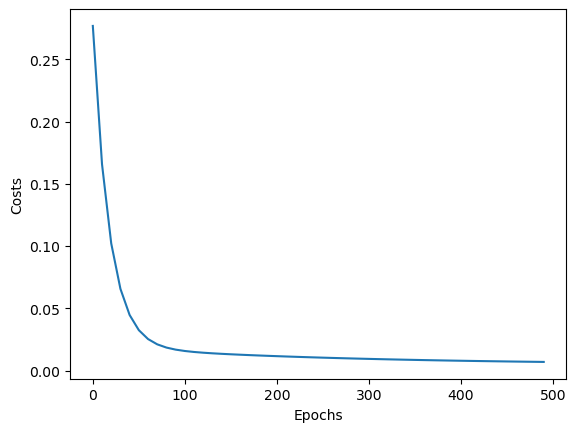

In [23]:
plt.plot(epoch_list, cost_list)
plt.xlabel('Epochs')
plt.ylabel('Costs')

In [25]:
def predict(area, bedrooms, w, b):
    #getting the scaled xs
    scaled_X = sx.transform([[area, bedrooms]])[0]
    
    #Gting the scaled prices
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600, 4, w, b)

C:\Users\abdim\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [27]:
import random

In [158]:
# def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    
#     #Getting the number of features
#     number_of_features = X.shape[1]
#     w = np.ones(shape=(number_of_features))
#     bias = 0
#     total_samples = X.shape[0]
    
#     cost_list =[]
#     epoch_list = []
    
#     for i  in range(epochs):
#         #Getting one random sample from the entire datasets
#         random_indx = random.randint(0,  total_samples - 1)
#         sample_x = X[random_indx]
#         sample_y = y_true[random_indx]
        
#         #calculting the predicted value and cost 
#         y_predicted = np.dot(w, sample_x.T) + bias
        
#         #Getting the derivatives
#         w_grad = -(2 / total_samples) * (sample_x.T.dot(sample_y - y_predicted))
#         bias_grad = - (2 / total_samples) * (sample_y - y_predicted)
        
#         #Adjusting the weights
#         w = w - learning_rate * w_grad
#         bias = bias - learning_rate  * bias_grad
#         cost = np.square(sample_y - y_predicted)
        
#         if i % 100 == 0:
#             cost_list.append(cost)
#             epoch_list.append(i)
#     return w, bias, cost, cost_list, epoch_list


def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70468901, 0.67373874]), -0.23017457270814676, 0.022111472335854056)

In [160]:
w_sgd, bias_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_Y.reshape(scaled_Y.shape[0],), 100000)
w_sgd, bias_sgd

(array([0.75698492, 0.41313262]), -0.11656550135769175)

Text(0, 0.5, 'Stochastic Cost')

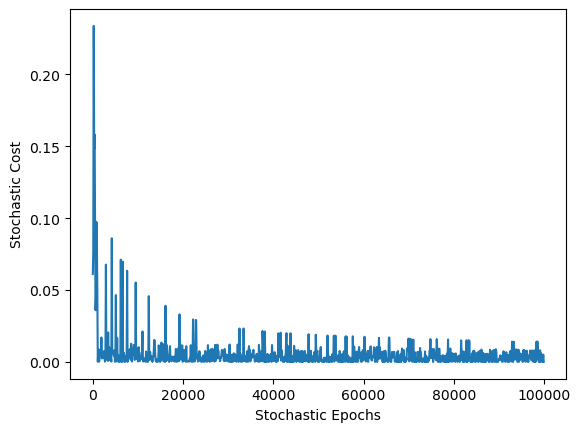

In [162]:
plt.plot(epoch_list_sgd, cost_list_sgd)
plt.xlabel('Stochastic Epochs')
plt.ylabel('Stochastic Cost')